# Michiels OpenCV tutorial

This is a short tutorial on OpenCV, the most widely used python library for Computer Vision.
OpenCV can be used to get data out of an image. 

This tutorial uses several of the OpenCV techniques for a.o. image enhancement, object detection and classification. 


## Content 
0. Install libraries
1. My first OpenCV script 
2. Resize and convert image
3. Printing a rectangle on an image
4. Tresholding
5. FindContours script
6. Blob detection
7. Histogram of an image
8. Hugh line P transforms

## 0. Install OpenCV and other libraries

In [ ]:
!pip install opencv-python

In [ ]:
#uncomment and install necessary packages
#!pip install numpy
#!pip install scipy.misc

## 1. My first OpenCV script
Just a simple script to import an image and show it

Make sure you have your pics to localhost:8888 jupyter notebook folder.

In [ ]:
#Below is just a basic script to open and show an image 
# The script will open a new window.

import cv2 # import the OpenCV library

# load the image
img = cv2.imread('opencv.png') # read the picture from localhost:8888 jupyter notebook folder
# show the image
cv2.imshow('image', img) #show the image in a pop up (pop-up)

cv2.waitKey(0) #To keep this window open. 0 = never ending.
cv2.destroyAllWindows()

In [4]:
# Some basic operators
import cv2
img = cv2.imread('opencv.png')

print(f'Image shape = {img.shape}') # returns rows, columns and channels (if image is color)
print(f'Image size = {img.shape[0:2]}')
print(f'image size = {img.size}') # returns no of pixels
print("Image type = " + str(type(img)))

Image shape = (322, 275, 3)
Image size = (322, 275)
image size = 265650
Image type = <class 'numpy.ndarray'>


In [10]:
print(f'The number of built-in methods for cv2 = {len(dir(cv2))}')

the number of built-in methods for cv2 = 2295


In [5]:
#get the values for blue, green, red
b,g,r, = cv2.split(img)
print(b)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


## 2. Resize and convert image

In [ ]:
#Resize the image. We will use an image from scipy.
import scipy.misc
import cv2 # import the OpenCV library
img = scipy.misc.face() # haal de wasbeer foto op uit SciPy module en benoem deze als 'img'

#option 1: relative resizing at 0.75 of original
newImg1 = cv2.resize(img, (0,0), fx=0.75, fy=0.75)
#optie 2: absoluut
newImg2 = cv2.resize(img, (550, 350)) #eerst img aanroepen, dan aantal pixels 
cv2.imshow('resized image', newImg1) #show the image in new window
cv2.waitKey(5) #close after 5 seconds
cv2.destroyAllWindows()

In [ ]:
# Convert the opencv image to gray 
import cv2
img = cv2.imread('opencv.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #there is also RGB2GRAY !
cv2.imshow('gray', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3. Adding elements to an image (rectangle, text)

When working with images you want to have the possibility of adding shapes and text to it

In [ ]:
# creating a rectangle and print it on the image
import cv2 
   
# load the image
image = cv2.imread('opencv.png') # Reading an image in default mode

# Draw a rectangle with blue line borders of thickness of 2 px
# initialize
window_name = 'Image'  # Window name in which image is displayed
start_point = (30, 5)   # x, y of left top corner of the rectangle 
end_point = (250, 310) #x, y the bottom right corner of rectangle
color = (255, 0, 0)    # frame color in BGR 
thickness = 2          # Line thickness of 2 px 
  
# Using cv2.rectangle() method
image = cv2.rectangle(image, start_point, end_point, color, thickness)
  
# Displaying the image 
cv2.imshow(window_name, image) 
cv2.waitKey(3)
cv2.destroyAllWindows() #does not always work on Mac

In [ ]:
import cv2

image = cv2.imread('opencv.png') # Reading an image in default mode

#set params
text= 'Michiel'
location = (10,100)
#font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color =  (255, 0, 255)
thickness = 2
lineType = cv2.LINE_AA

#Add text to image

image = cv2.putText(image,text,location,font,fontScale,color,thickness, lineType)
# Displaying the image 
cv2.imshow('img', image) 
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4. Tresholding
source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

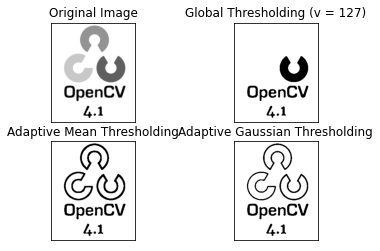

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv.png',0)
img = cv2.medianBlur(img,5)


ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 5. Find contours
source 1: https://www.youtube.com/watch?v=FbR9Xr0TVdY
source 2: https://likegeeks.com/python-image-processing#Get-image-contour 

The cell below will draw a contour around an image and will count the number of contours. 

In [12]:
import cv2

#load the picture and convert to gray. 
img = cv2.imread('opencv.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#define ret and treshold using the gray image, with 127 of max 255
ret, thresh = cv2.threshold(imgray, 200, 255, 0)
#find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#draw the image, use the original color image
img_contour = cv2.drawContours(img, contours, -1, (255,0,255), 3) #-1= all contours, color, thickness

#print (contours)
print(f"Number of contours = {len(contours)}")
cv2.imshow('Image', img_contour)
cv2.waitKey(3)
cv2.destroyAllWindows()

Number of contours = 16


## 6. Blob detection
Source: https://github.com/spmallick/learnopencv/tree/master/BlobDetector

A 'blob' is a group of pixels in an image that share a property, for example same (gray scale) color value. We can use the blob detection function to identify these blobs, draw a circle around (and optionally count them). 

In [ ]:
#!/usr/bin/python

# Standard imports
import cv2
import numpy as np;
# Read image
im = cv2.imread("blob.jpg", cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
    
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
	detector = cv2.SimpleBlobDetector(params)
else : 
	detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

In [ ]:
#source https://www.youtube.com/watch?v=3D7O_kZi8-o&t=4s

# use HSV = Hue, Saturation and Value aka hex color
# Hue is color components (range 0-360)
# Saturation is the amount of color (0-100%)
# Value is basically the brightness (0-100%)

import cv2
import numpy as np

def nothing(x): #callback function
    pass

cv2.namedWindow('Tracking') #ISSUE NOT ALL TRACKBARS ARE SHOWN!
cv2.createTrackbar("LH", 'Tracking', 0, 255, nothing) #LowerHue
cv2.createTrackbar("LS", 'Tracking', 0, 255, nothing) #LowerSat
cv2.createTrackbar("LV", 'Tracking', 0, 255, nothing) #LowerVal
cv2.createTrackbar("UH", 'Tracking', 255, 255, nothing)
cv2.createTrackbar("LS", 'Tracking', 255, 255, nothing)
cv2.createTrackbar("LV", 'Tracking', 255, 255, nothing)

while True:
    frame = cv2.imread('OpenCV_rgb.png') # import an RGB image here!!
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    l_h= cv2.getTrackbarPos('LH', 'Tracking')
    l_s= cv2.getTrackbarPos('LS', 'Tracking')
    l_v= cv2.getTrackbarPos('LV', 'Tracking')
    
    u_h= cv2.getTrackbarPos('LH', 'Tracking')
    u_s= cv2.getTrackbarPos('LS', 'Tracking')
    u_v= cv2.getTrackbarPos('LV', 'Tracking')
    
    l_b= np.array([110,50,50])#this is for the blue smartie lower_limit_blue original: (110,50,50)
    u_b= np.array([130,255,255]) #oroginal (130,255,255)
    
    mask = cv2.inRange(hsv, l_b, u_b) #define a mask
    
    res = cv2.bitwise_and(frame, frame, mask=mask) #bitwise res=result
    
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    key = cv2.waitKey(1)
    if key ==27:
        break
cv2.destroyAllWindows()


## 7. OpenCV Histograms with cv2.split, matplot lib. Also to count colors
Source: https://www.youtube.com/watch?v=F9TZb0XBow0

Rather complicated way of counting colors. It's easier to use np.asarray function (see Numpy tutorial)

In [ ]:
## ISSUE: remove 0 and 255 values at end of range!

import cv2
from matplotlib import pyplot as plt

img =cv2.imread('opencv.png')

b,g,r = cv2.split(img)
#print(b[0])
#cv2.imshow('img', img)
#printcv2.imshow('b', b)
#cv2.imshow('g', g)
#printcv2show('r', r)

plt.hist(b.ravel(), 256, [0,256])
plt.hist(g.ravel(), 256, [0,256])
#plt.hist(r.ravel(), 256, [0,256])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv.png')
color = ('b','g','r')
for i,col in enumerate(color):
     histr = cv2.calcHist([img],[i],None,[256],[0,256])
     plt.plot(histr,color = col)
     plt.xlim([0,256])
plt.show()
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 8. Hough Line P Transformations

source: https://www.youtube.com/watch?v=rVBVqVmHtfc&list=PLS1QulWo1RIa7D1O6skqDQ-JZ1GGHKK-K&index=34

This script will identify lines in an image using the 'Hough Line P' transformation. See wikpedia: https://en.wikipedia.org/wiki/Hough_transform for more info.

The function is cv2.HoughLinesP, which takes the following arguments:
rho = Distance resolution of the accumulator in pixels
theta = Angle resolution of the accumulator in radians
minLineLength
MaxLineGap

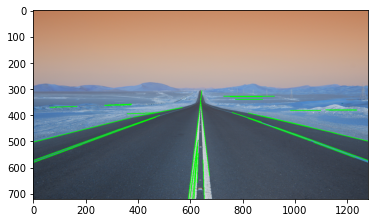

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import cv2

img_big = cv2.imread('road2.jpg')
#img = cv2.resize(img_big)
img = cv2.resize(img_big, (1280,720), interpolation = cv2.INTER_AREA)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50,150, apertureSize = 3)
#cv2.imshow('edges', edges)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100, minLineLength=100,maxLineGap=10)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)
    
plt.imshow(img)
plt.show()
#cv2.imshow('image', img)
cv2.waitKey(0)